<a href="https://www.kaggle.com/code/devisdesnug/alarm-classification-rnn?scriptVersionId=92123469" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        break

4_non_alarm_151.wav
3_gas_alarm_106.wav
5_tsunami_alarm_345.wav
1_danger_alarm_531.wav
2_fire_alarm_223.wav


In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-3]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 3000:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

3000

In [5]:
paths[:5]

['/kaggle/input/alarm-dataset/dataset/alarm_non/4_non_alarm_151.wav',
 '/kaggle/input/alarm-dataset/dataset/alarm_non/4_non_alarm_500.wav',
 '/kaggle/input/alarm-dataset/dataset/alarm_non/4_non_alarm_232.wav',
 '/kaggle/input/alarm-dataset/dataset/alarm_non/4_non_alarm_300.wav',
 '/kaggle/input/alarm-dataset/dataset/alarm_non/4_non_alarm_316.wav']

In [6]:
labels[:10]

['non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['alarm'] = paths
df['label'] = labels
df.head(10)

,alarm,label
0,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
1,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
2,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
3,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
4,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
5,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
6,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
7,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
8,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non
9,/kaggle/input/alarm-dataset/dataset/alarm_non/...,non


In [8]:
df['label'].value_counts()

non        600
gas        600
tsunami    600
danger     600
fire       600
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

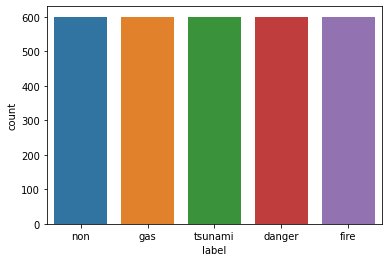

In [9]:
sns.countplot(df['label'])

In [10]:
def waveplot(data, sr, alarm):
    plt.figure(figsize=(10,4))
    plt.title(alarm, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, alarm):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(alarm, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

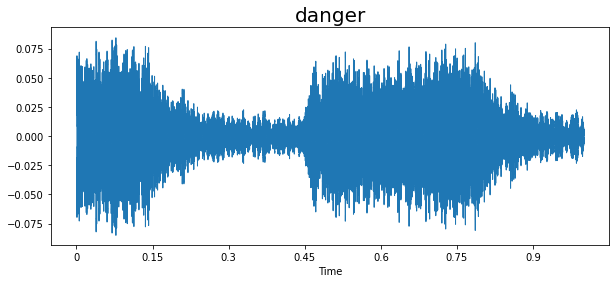

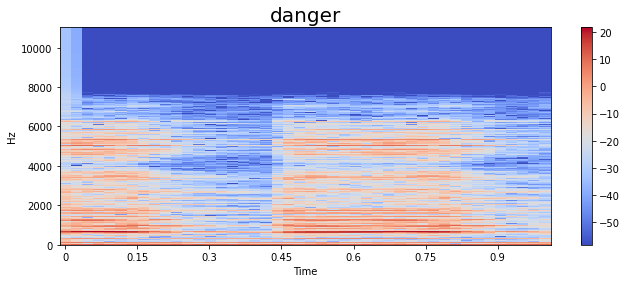

In [11]:
alarm = 'danger'
path = np.array(df['alarm'][df['label']==alarm])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, alarm)
spectogram(data, sampling_rate, alarm)
Audio(path)

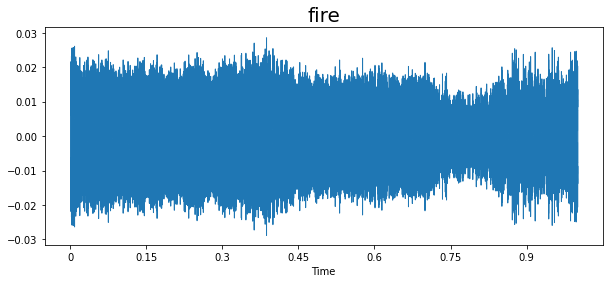

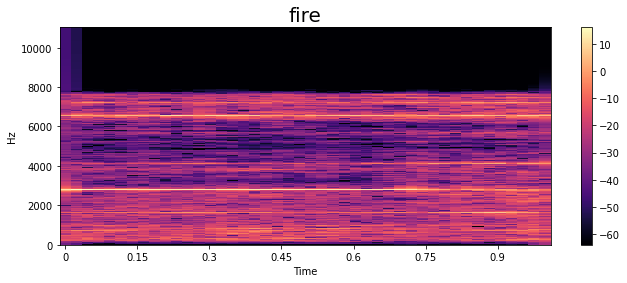

In [12]:
alarm = 'fire'
path = np.array(df['alarm'][df['label']==alarm])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, alarm)
spectogram(data, sampling_rate, alarm)
Audio(path)

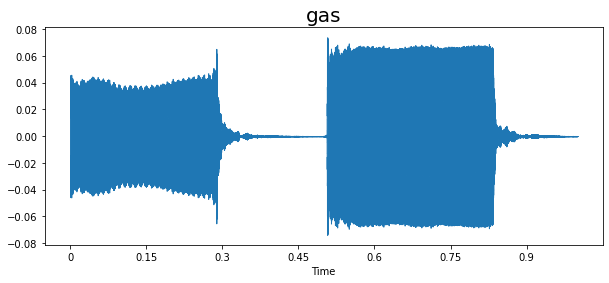

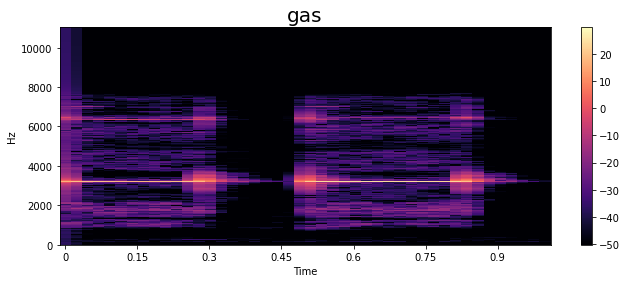

In [13]:
alarm = 'gas'
path = np.array(df['alarm'][df['label']==alarm])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, alarm)
spectogram(data, sampling_rate, alarm)
Audio(path)

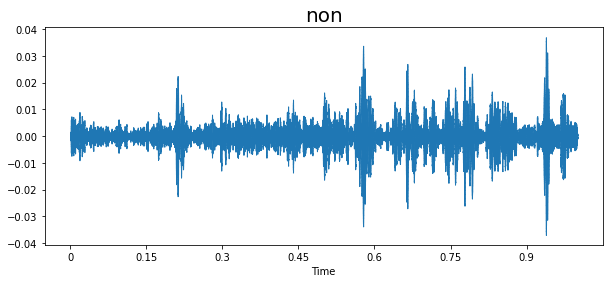

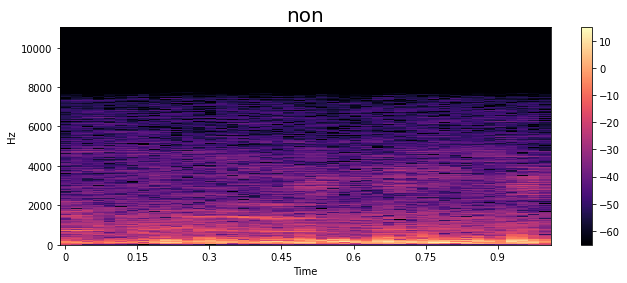

In [14]:
alarm = 'non'
path = np.array(df['alarm'][df['label']==alarm])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, alarm)
spectogram(data, sampling_rate, alarm)
Audio(path)

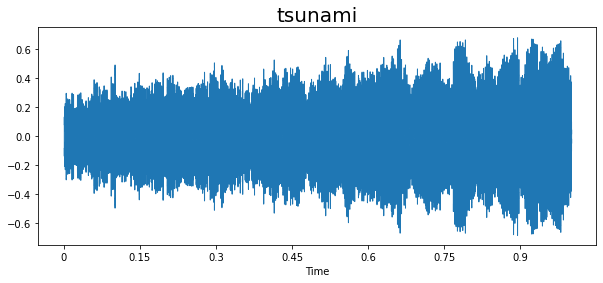

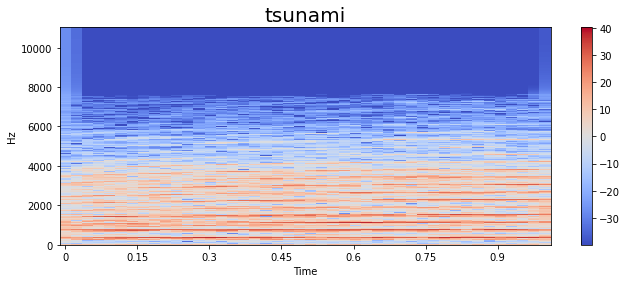

In [15]:
alarm = 'tsunami'
path = np.array(df['alarm'][df['label']==alarm])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, alarm)
spectogram(data, sampling_rate, alarm)
Audio(path)

<h1><b>Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=1, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['alarm'][0])

array([-5.0550897e+02,  1.6546466e+02, -5.9420238e+00,  6.2804611e+01,
       -7.3137298e+00,  2.7928692e+01,  1.5049137e+01,  1.0620930e+01,
       -5.4289341e+00,  8.6341896e+00,  3.7267036e+00, -1.1872705e+01,
       -4.7836328e+00, -1.0370981e+01,  1.7688705e-01, -9.6857100e+00,
       -6.8844676e-01, -1.0683152e+01, -6.8440614e+00, -4.6147308e+00,
       -5.6772189e+00, -1.4276999e+00, -9.1719732e+00, -2.8043549e+00,
       -6.8445773e+00, -3.4969652e+00, -4.8789425e+00, -1.3772950e+00,
       -5.5471382e+00, -6.8145566e+00, -4.2641540e+00, -5.4021025e+00,
       -8.8648224e-01, -2.7726290e+00, -9.4672930e-01, -3.7476606e+00,
        1.3743389e+00, -2.7977254e+00, -5.2325006e+00, -3.3773026e+00],
      dtype=float32)

In [18]:
X_mfcc = df['alarm'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-505.50897, 165.46466, -5.9420238, 62.80461, ...
1       [-577.16724, 114.86044, -30.015749, 31.902552,...
2       [-548.0349, 139.64154, -26.799358, 44.901432, ...
3       [-548.30054, 138.38304, -29.2764, 45.439137, -...
4       [-211.11302, 135.22124, -86.82089, 57.923264, ...
                              ...                        
2995    [-242.89366, -74.477776, -59.336193, 84.83413,...
2996    [-231.92656, 64.075775, -91.395195, 67.2082, -...
2997    [-91.26608, 124.270065, -112.264275, 11.594888...
2998    [-230.28273, 40.10786, -93.93869, 75.16641, -5...
2999    [-442.15256, 44.109554, -81.152824, 61.85681, ...
Name: alarm, Length: 3000, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3000, 40)

In [21]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3000, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y = y.toarray()

In [24]:
y.shape

(3000, 5)

<h1><b>Model Creation

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-04-05 02:04:22.137585: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 3

In [26]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

2022-04-05 02:04:22.934545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
38/38 [==============================] - 7s 124ms/step - loss: 0.7435 - accuracy: 0.7608 - val_loss: 6.7481 - val_accuracy: 0.0000e+00
Epoch 2/50
38/38 [==============================] - 4s 104ms/step - loss: 0.2107 - accuracy: 0.9408 - val_loss: 7.5785 - val_accuracy: 0.0000e+00
Epoch 3/50
38/38 [==============================] - 4s 108ms/step - loss: 0.1234 - accuracy: 0.9650 - val_loss: 9.0122 - val_accuracy: 0.0000e+00
Epoch 4/50
38/38 [==============================] - 5s 123ms/step - loss: 0.0929 - accuracy: 0.9775 - val_loss: 8.8429 - val_accuracy: 0.0000e+00
Epoch 5/50
38/38 [==============================] - 4s 108ms/step - loss: 0.0637 - accuracy: 0.9858 - val_loss: 9.3009 - val_accuracy: 0.0000e+00
Epoch 6/50
38/38 [==============================] - 4s 106ms/step - loss: 0.0488 - accuracy: 0.9879 - val_loss: 10.6023 - val_accuracy: 0.0000e+00
Epoch 7/50
38/38 [==============================] - 4s 107ms/step - loss: 0.0486 - accuracy: 0.9892 - val_loss: 11.0873 - v

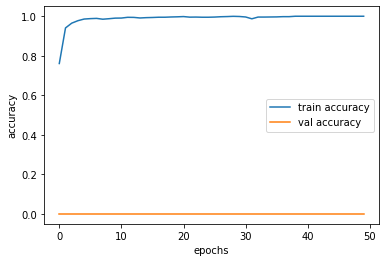

In [27]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

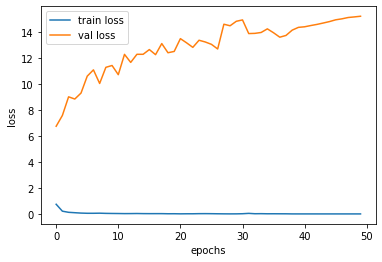

In [28]:


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

